# ========== IMPORTS ==========

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

# ========== LOAD DATA ==========

In [3]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

# Convert timestamp

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set as index (optional but useful for time-series)

In [5]:
df.set_index('Timestamp', inplace=True)

# ========== BASIC INFO ==========

In [6]:
print("Shape:", df.shape)

Shape: (525600, 18)


In [7]:
print("\nColumns:\n", df.columns)


Columns:
 Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')


In [11]:
print("\nData Types:\n")
print(df.dtypes)


Data Types:

GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [12]:
print("\nMissing Values:\n")
print(df.isna().sum())


Missing Values:

GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [13]:
print("\nStatistical Summary:\n")
print(df.describe(include='all'))


Statistical Summary:

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%       


# ========== LINE PLOT FOR SOLAR RADIATION ==========

In [14]:
solar_cols = ['GHI','DNI','DHI','ModA','ModB']
df[solar_cols].head()

,GHI,DNI,DHI,ModA,ModB
Timestamp,,,,,
2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0
2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0
2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0
2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0
2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0


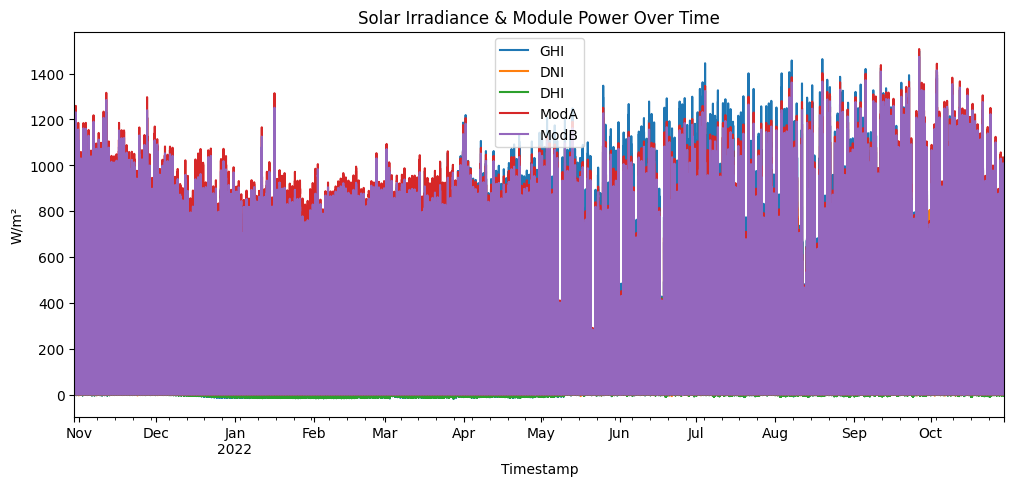

In [15]:
df[solar_cols].plot(figsize=(12,5))
plt.title("Solar Irradiance & Module Power Over Time")
plt.ylabel("W/m²")
plt.show()


# ========== TEMPERATURE & HUMIDITY ==========

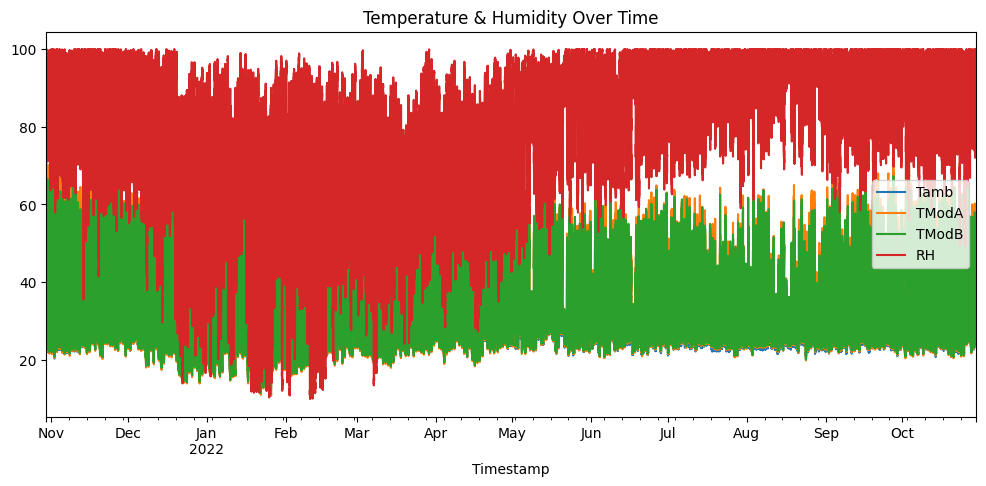

In [16]:
df[['Tamb','TModA','TModB','RH']].plot(figsize=(12,5))
plt.title("Temperature & Humidity Over Time")
plt.show()

# ========== WIND & PRESSURE ==========

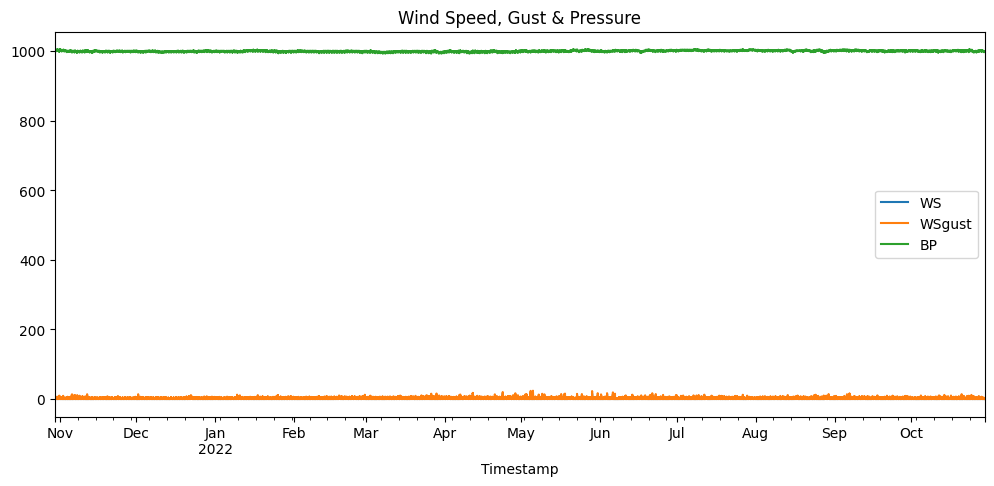

In [17]:
df[['WS','WSgust','BP']].plot(figsize=(12,5))
plt.title("Wind Speed, Gust & Pressure")
plt.show()

# ========== BOXPLOTS FOR NUMERIC FEATURES ==========

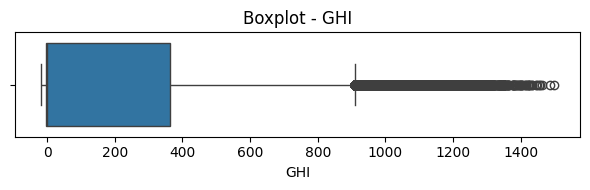

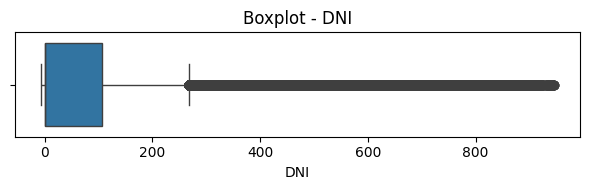

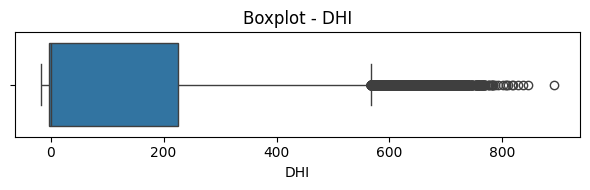

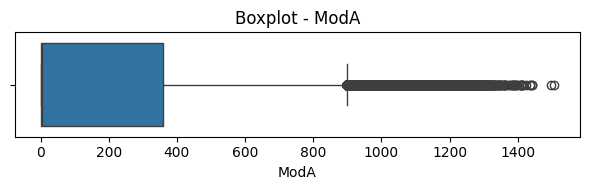

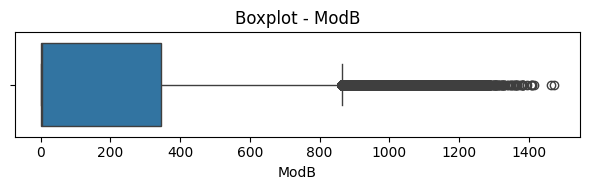

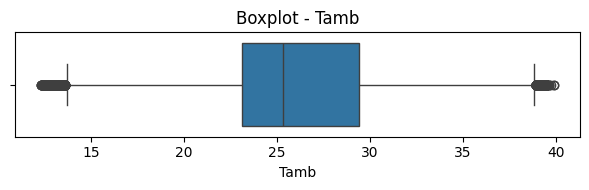

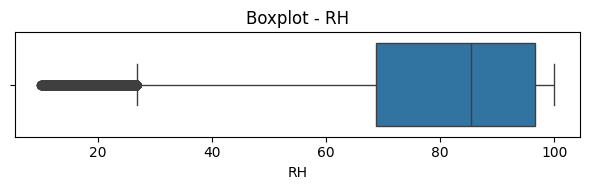

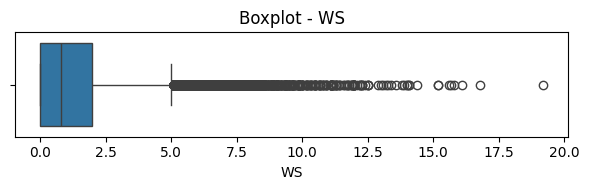

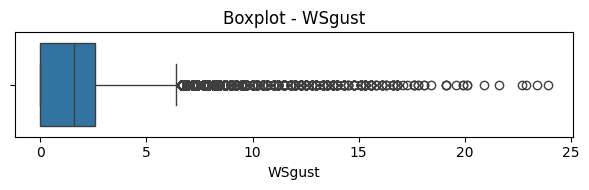

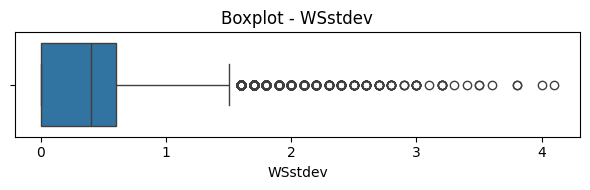

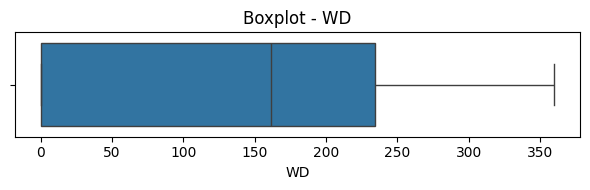

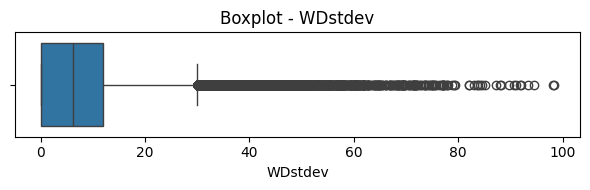

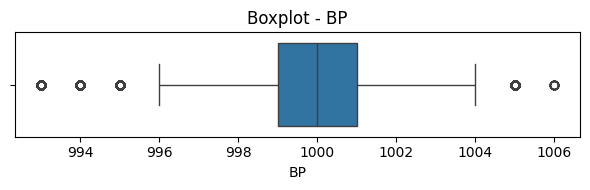

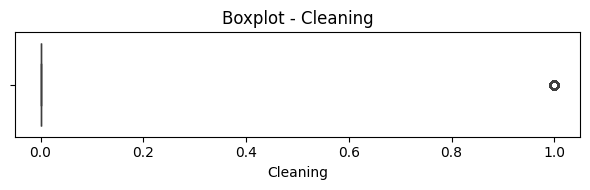

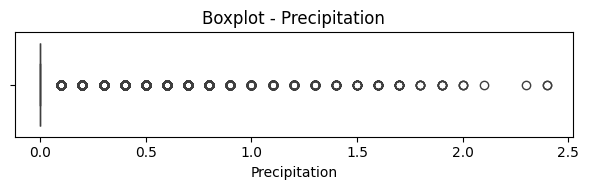

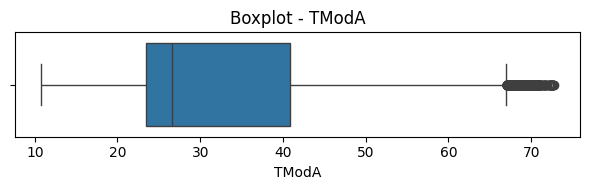

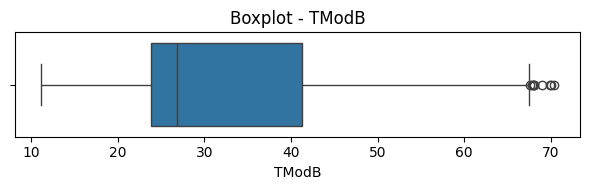

In [18]:
numeric_cols = [c for c in df.select_dtypes(include='number').columns if df[c].nunique()>1]

for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.show()

# ========== CORRELATION HEATMAP ==========

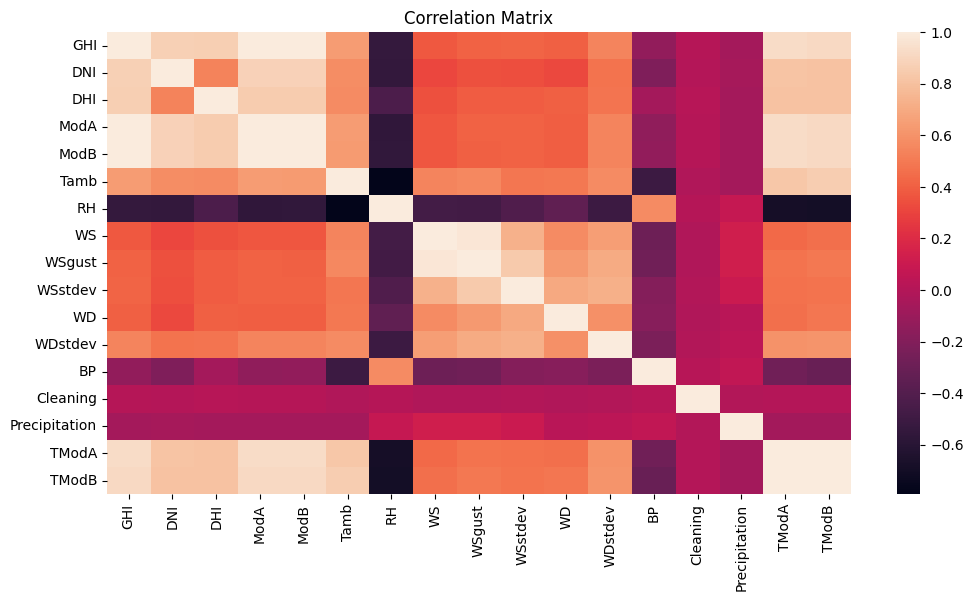

In [19]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=False)
plt.title("Correlation Matrix")
plt.show()


# ========== DAILY AGGREGATION ==========

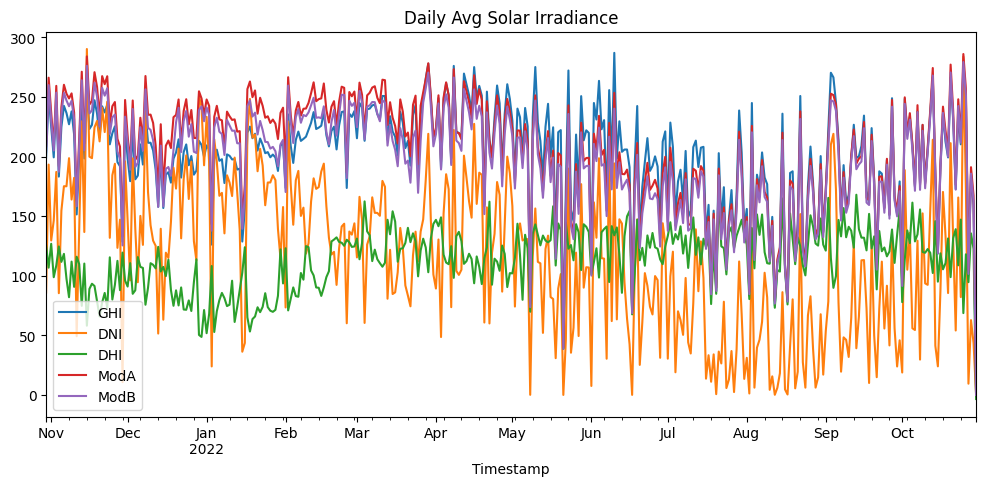

In [20]:
daily = df.resample('D').mean()
daily[solar_cols].plot(figsize=(12,5))
plt.title("Daily Avg Solar Irradiance")
plt.show()

# ========== PAIRPLOT (SAMPLE ONLY TO AVOID HANG) ==========

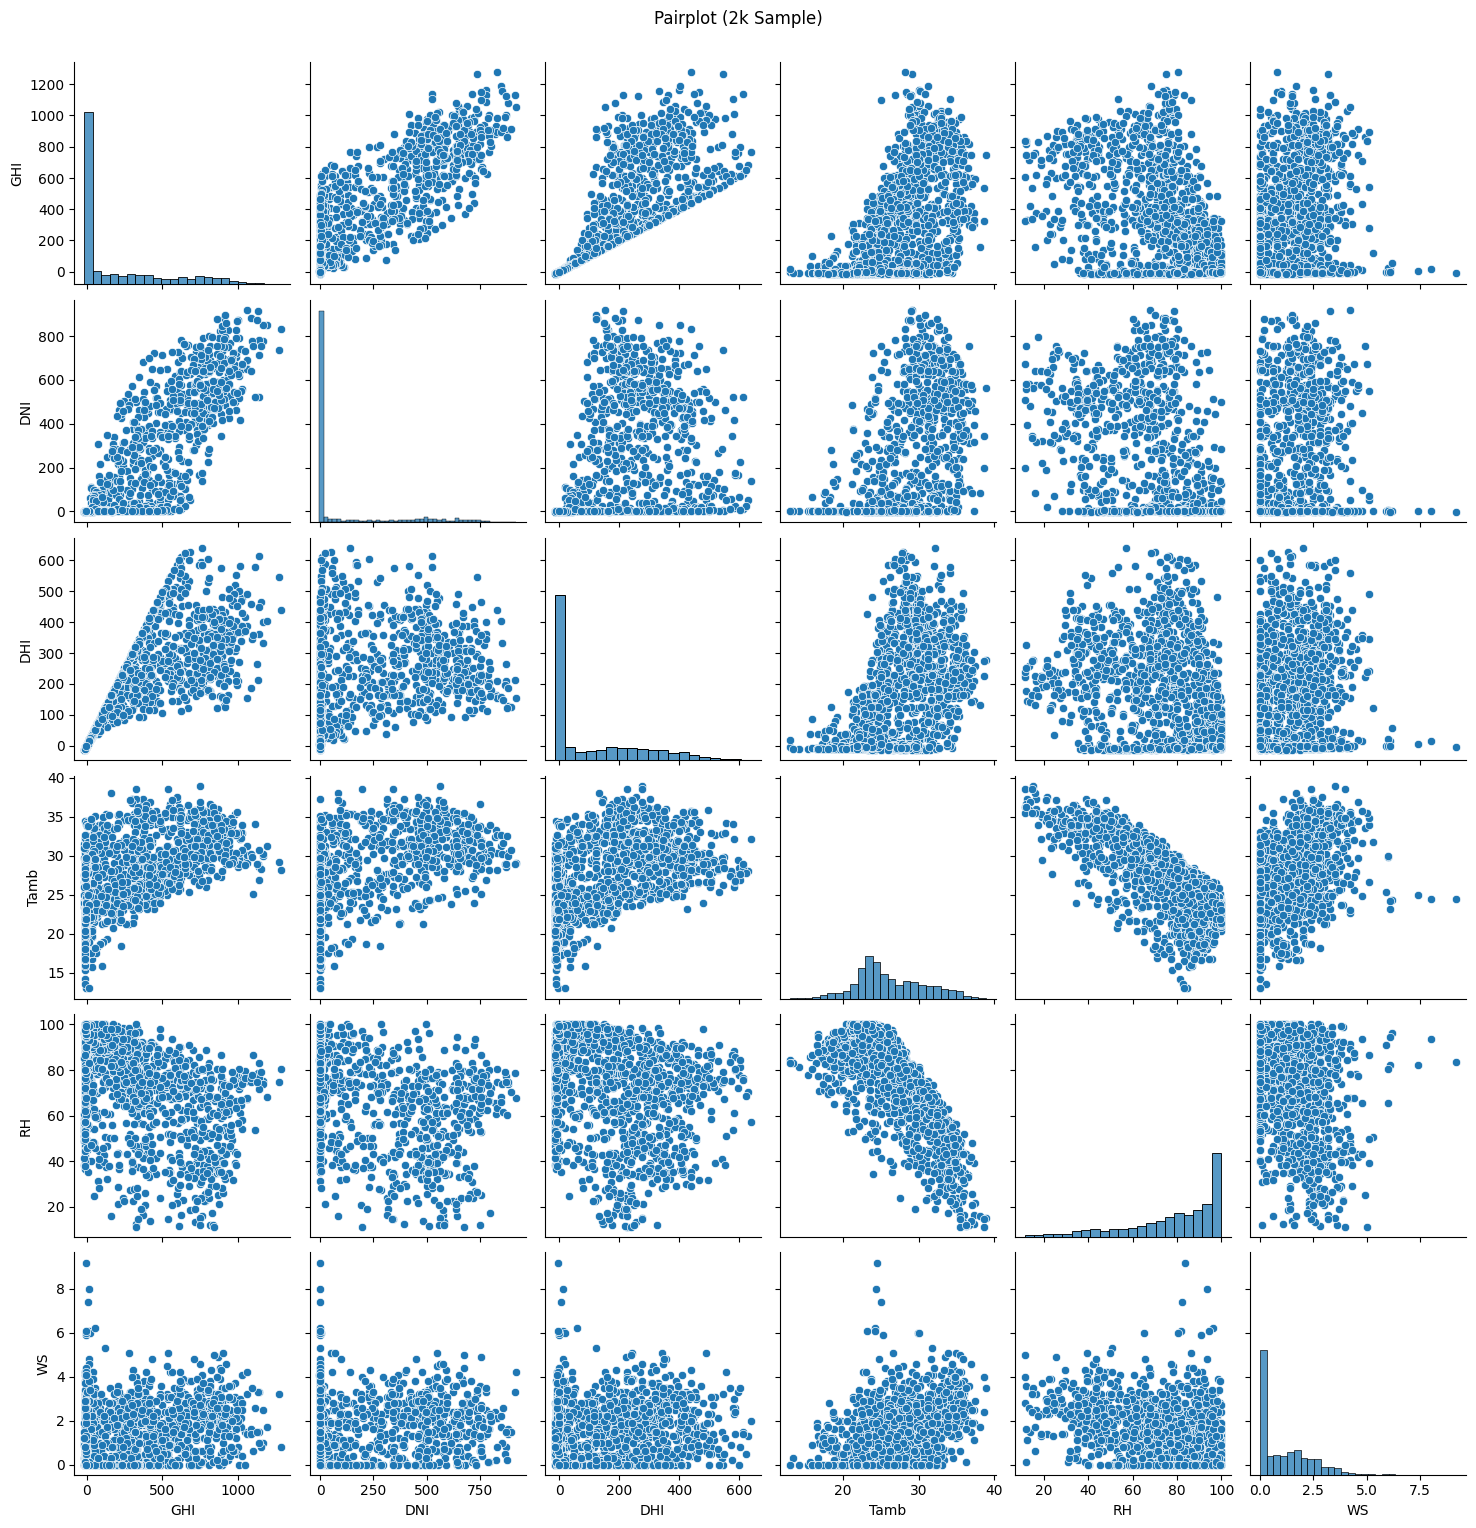

In [21]:
sample = df.sample(2000, random_state=42)

sns.pairplot(sample[['GHI','DNI','DHI','Tamb','RH','WS']])
plt.suptitle("Pairplot (2k Sample)", y=1.02)
plt.show()

# ========== OUTLIER DETECTION ==========

In [22]:
for col in ['GHI','DNI','DHI','Tamb','WS']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((df[col]<lower) | (df[col]>upper)).sum()
    print(f"{col}: {outliers} outliers")

print("\nEDA Completed ✅")

GHI: 15853 outliers
DNI: 101688 outliers
DHI: 4407 outliers
Tamb: 652 outliers
WS: 3169 outliers

EDA Completed ✅
